# A. Daily attendance of bike tracks
every row contains the number of bicycles on every track of the city(montreal), 
for every day of the year.
Can you infer anything from the attendence record?

url = "https://raw.githubusercontent.com/ndas1971/Misc/master/bikes.csv"

1. Read 
2. Check head 
3. Check summary statistics 
4. plot the daily attendance of two tracks, 'Berri1', 'PierDup'
5. Check index , explore weekday_name attributes 
6. Get sum of all attendance as a function of the weekday
7. Display this in figure , what is the inference?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/ndas1971/Misc/master/bikes.csv"

In [6]:
df = pd.read_csv(url, index_col='Date', parse_dates=True, dayfirst=True)
df.head()
df.index
df.columns
df.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


<AxesSubplot:xlabel='Date'>

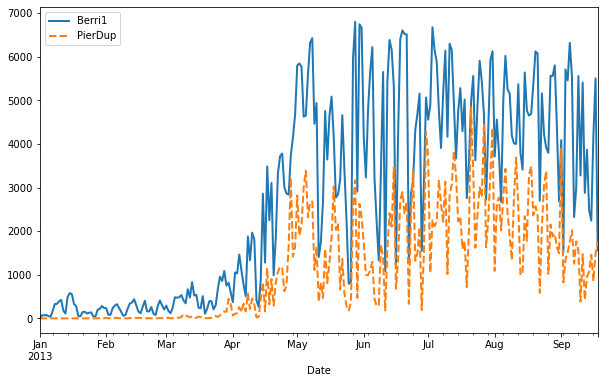

In [7]:
df[ ['Berri1', 'PierDup'] ].plot(figsize=(10,6), style=['-', '--'], lw=2)